In [1]:
# import libraries
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading data
dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

# data cleaning
df['job_posted_date']= pd.to_datetime(df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
# only get data analyst job in the US
df_DA_US= df[(df['job_title_short'] == 'Data Analyst')& (df['job_country']== 'United States')].copy()

df_DA_US= df_US.dropna(subset=['salary_year_avg'])

In [6]:
df_DA_US= df_DA_US.explode('job_skills')

In [16]:
df_DA_US_group= df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_top_pay= df_DA_US_group.sort_values(by='median', ascending=False).head(10)

df_DA_skills= df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

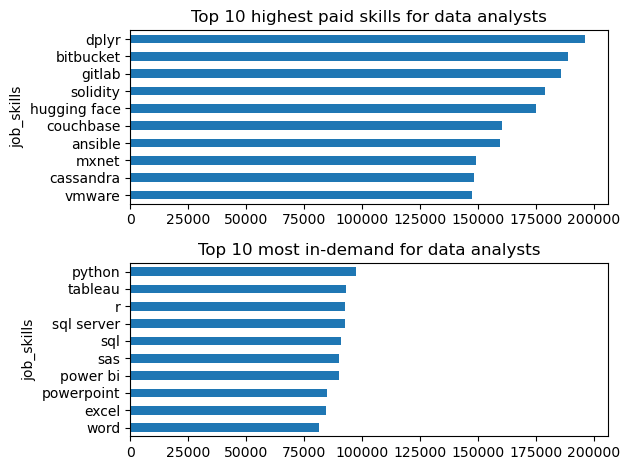

In [23]:
fig, ax= plt.subplots(2,1)

df_DA_top_pay[::-1].plot(kind='barh', y= 'median', ax=ax[0], legend=False)
# ax[0].invert_yaxis()
ax[0].set_title('Top 10 highest paid skills for data analysts')


df_DA_skills[::-1].plot(kind='barh', y= 'median', ax=ax[1], legend= False)
ax[1].set_title('Top 10 most in-demand for data analysts')
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()